In [1]:
%pip install matplotlib
%pip install seaborn
%pip install xgboost
%pip install keras
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\janak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\janak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\janak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\janak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from scipy.stats import kruskal
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
#Načítanie dát
train=pd.read_csv("train.csv",sep='|')
test=pd.read_csv("test.csv",sep='|')
real=pd.read_csv("real.csv")

#Pridanie atribútu fraud do testovacej množiny
test["fraud"]=real["fraud"]

In [ ]:
#Pochopenie dát

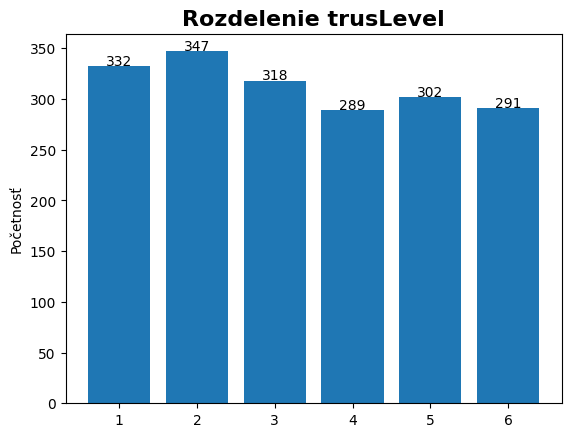

In [ ]:
#Zobrazenie rozdeleia dát atribútu trustLevel
fraud_counts = train['trustLevel'].value_counts().sort_index()

plt.bar(fraud_counts.index, fraud_counts.values)

plt.title('Rozdelenie trusLevel',fontsize=16,weight='bold')
plt.ylabel('Početnosť')

plt.xticks([1,2,3,4,5,6], [ '1','2','3','4','5','6'], ha='center')
for index, value in enumerate(fraud_counts.values):
    plt.text(fraud_counts.index[index], value + 1, str(value), ha='center', fontsize=10)
plt.show()

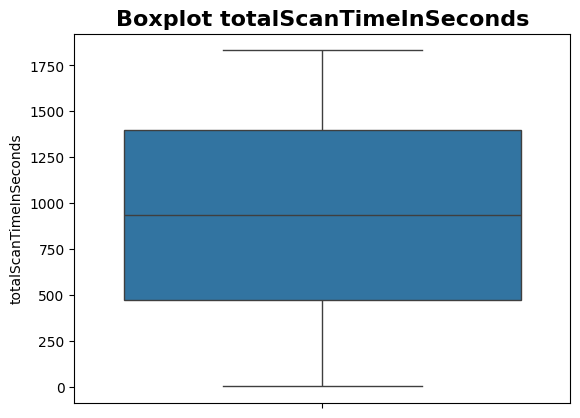

In [ ]:
#Zobrazenie rozdeleia dát atribútu totalScanTimeInSeconds
sns.boxplot(y="totalScanTimeInSeconds", data=train)
plt.title('Boxplot totalScanTimeInSeconds', fontsize=16, weight='bold')
plt.show()

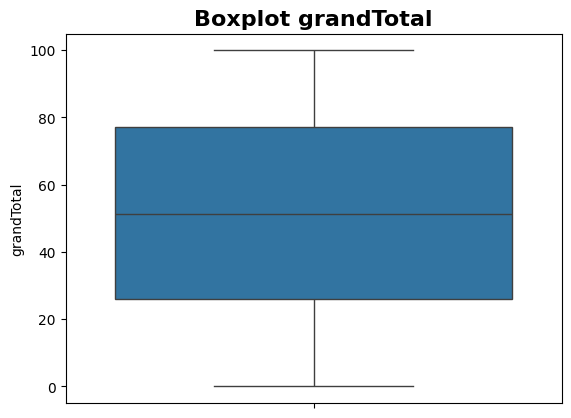

In [ ]:
#Zobrazenie rozdeleia dát atribútu grandTotal
sns.boxplot(y="grandTotal", data=train)
plt.title('Boxplot grandTotal', fontsize=16, weight='bold')
plt.show()

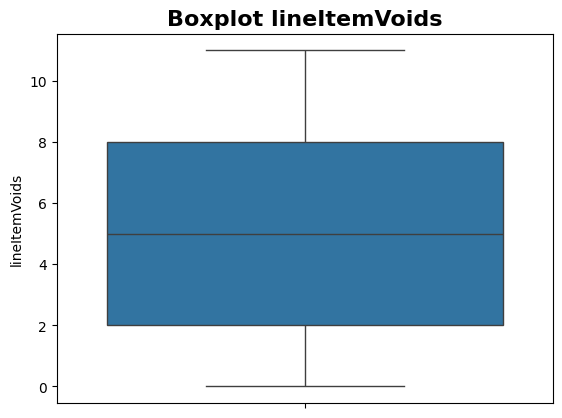

In [ ]:
#Zobrazenie rozdeleia dát atribútu lineItemVoids
sns.boxplot(y="lineItemVoids", data=train)
plt.title('Boxplot lineItemVoids', fontsize=16, weight='bold')
plt.show()

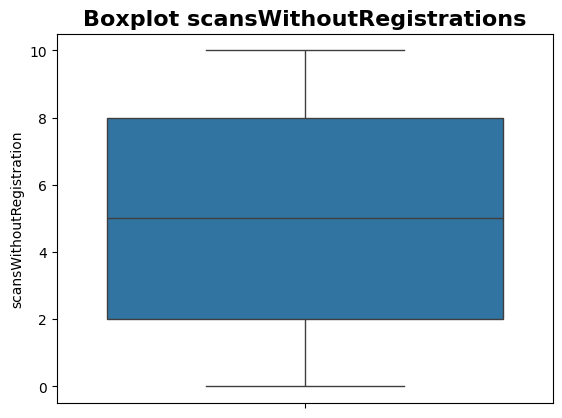

In [ ]:
#Zobrazenie rozdeleia dát atribútu scansWithoutRegistration
sns.boxplot(y="scansWithoutRegistration", data=train)
plt.title('Boxplot scansWithoutRegistrations', fontsize=16, weight='bold')
plt.show()

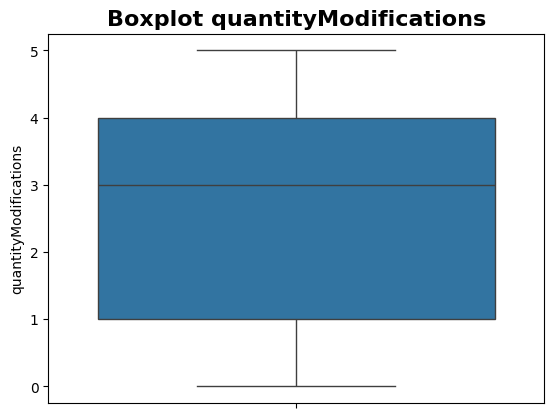

In [ ]:
#Zobrazenie rozdeleia dát atribútu quantityModifications
sns.boxplot(y="quantityModifications", data=train)
plt.title('Boxplot quantityModifications', fontsize=16, weight='bold')
plt.show()

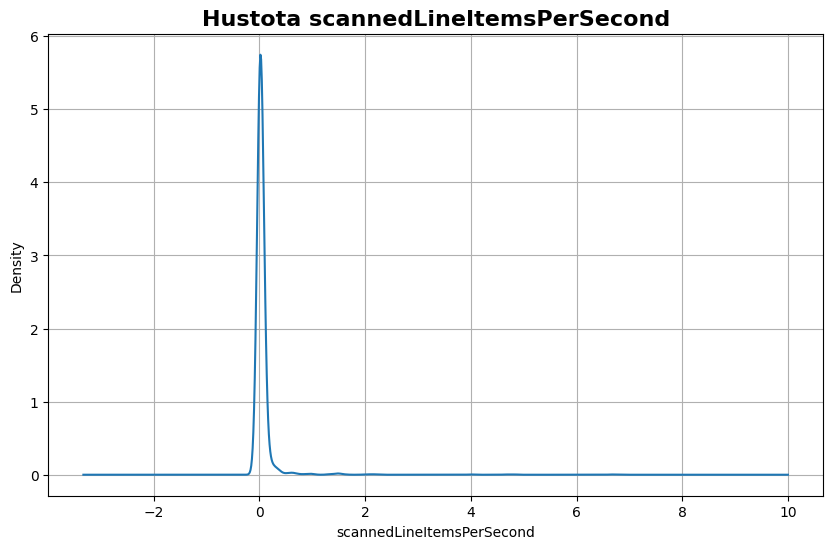

In [ ]:
#Zobrazenie rozdeleia dát atribútu scannedLineItemsPerSecond
plt.figure(figsize=(10, 6))
train['scannedLineItemsPerSecond'].plot(kind='density')
plt.title('Hustota scannedLineItemsPerSecond',fontsize=16, weight='bold')
plt.xlabel('scannedLineItemsPerSecond')
plt.grid(True)
plt.show()

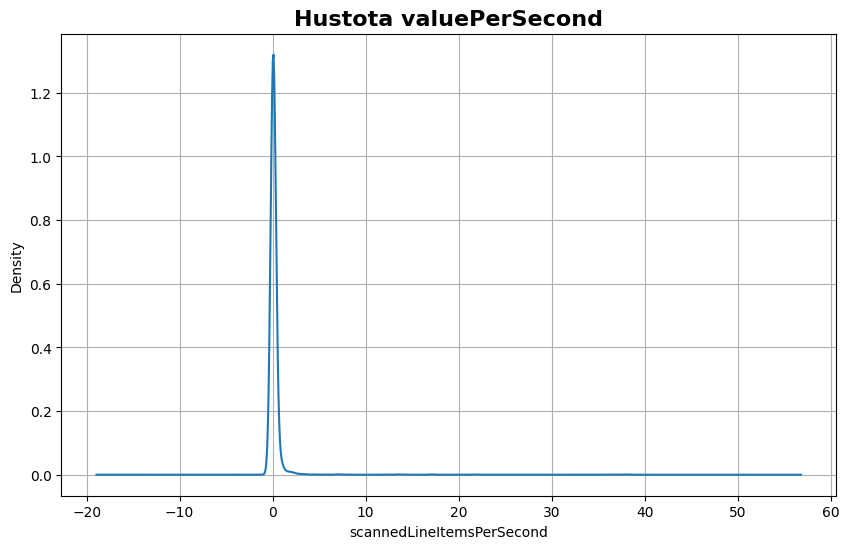

In [ ]:
#Zobrazenie rozdeleia dát atribútu valuePerSecond
plt.figure(figsize=(10, 6))
train['valuePerSecond'].plot(kind='density')
plt.title('Hustota valuePerSecond',fontsize=16, weight='bold')
plt.xlabel('scannedLineItemsPerSecond')
plt.grid(True)
plt.show()

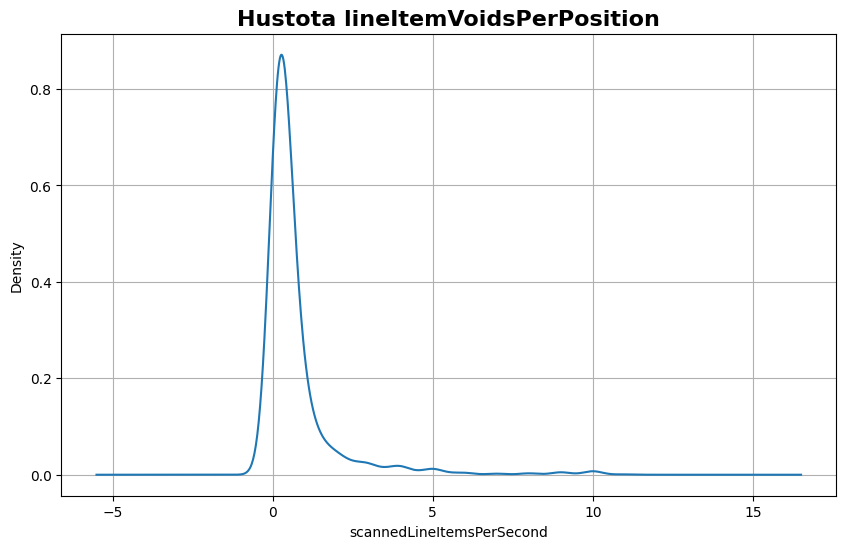

In [ ]:
#Zobrazenie rozdeleia dát atribútu lineItemVoidsPerPosition
plt.figure(figsize=(10, 6))
train['lineItemVoidsPerPosition'].plot(kind='density')
plt.title('Hustota lineItemVoidsPerPosition',fontsize=16, weight='bold')
plt.xlabel('scannedLineItemsPerSecond')
plt.grid(True)
plt.show()

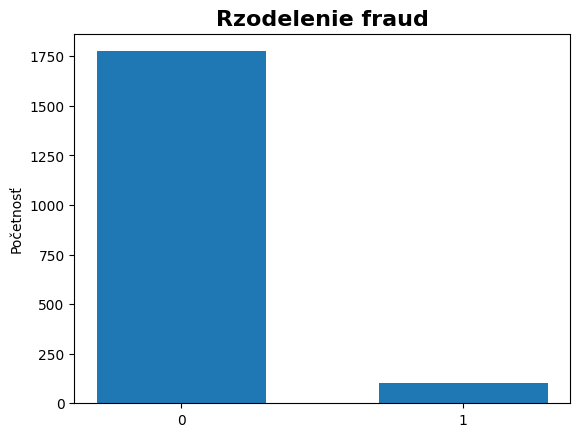

In [ ]:
#Zobrazenie rozdeleia dát atribútu fraud
fraud_counts = train['fraud'].value_counts().sort_index()
plt.bar(fraud_counts.index, fraud_counts.values, width=0.6)
plt.title('Rzodelenie fraud',fontsize=16,weight='bold')
plt.ylabel('Početnosť')
plt.xticks([0, 1], ['0', '1'], ha='center')
plt.show()

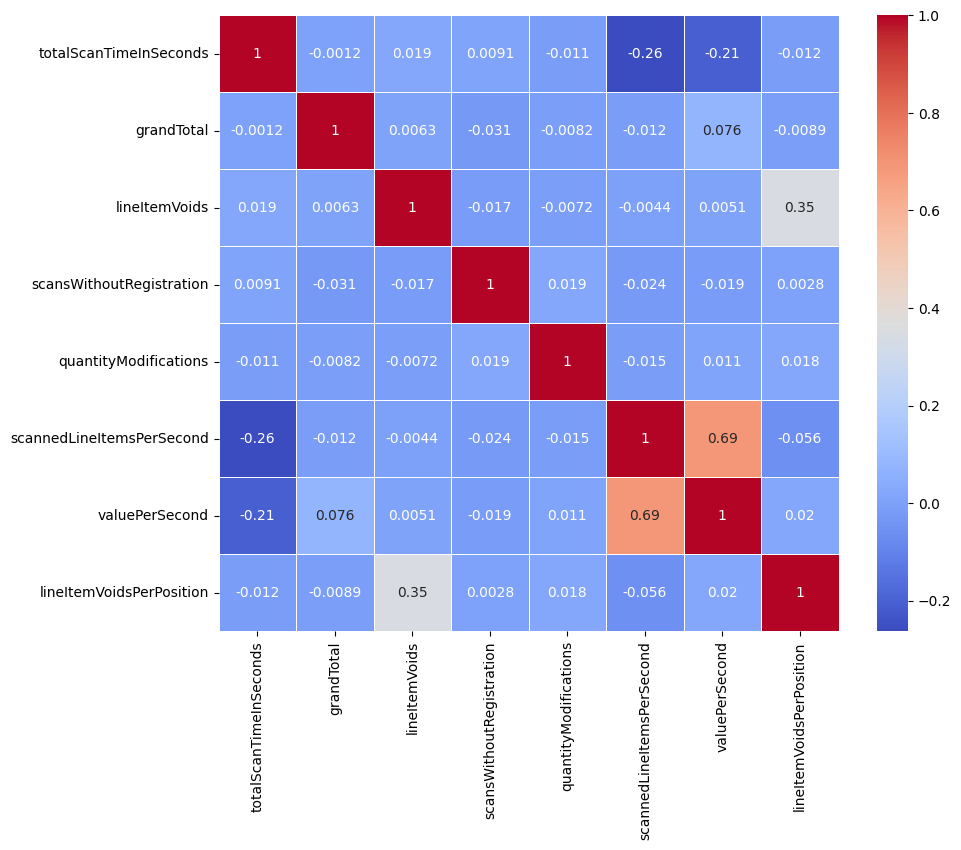

In [ ]:
#Zobrazenie vzťahov numerických atribútov korelačnou maticou
df= train.drop(['trustLevel', 'fraud'], axis=1)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

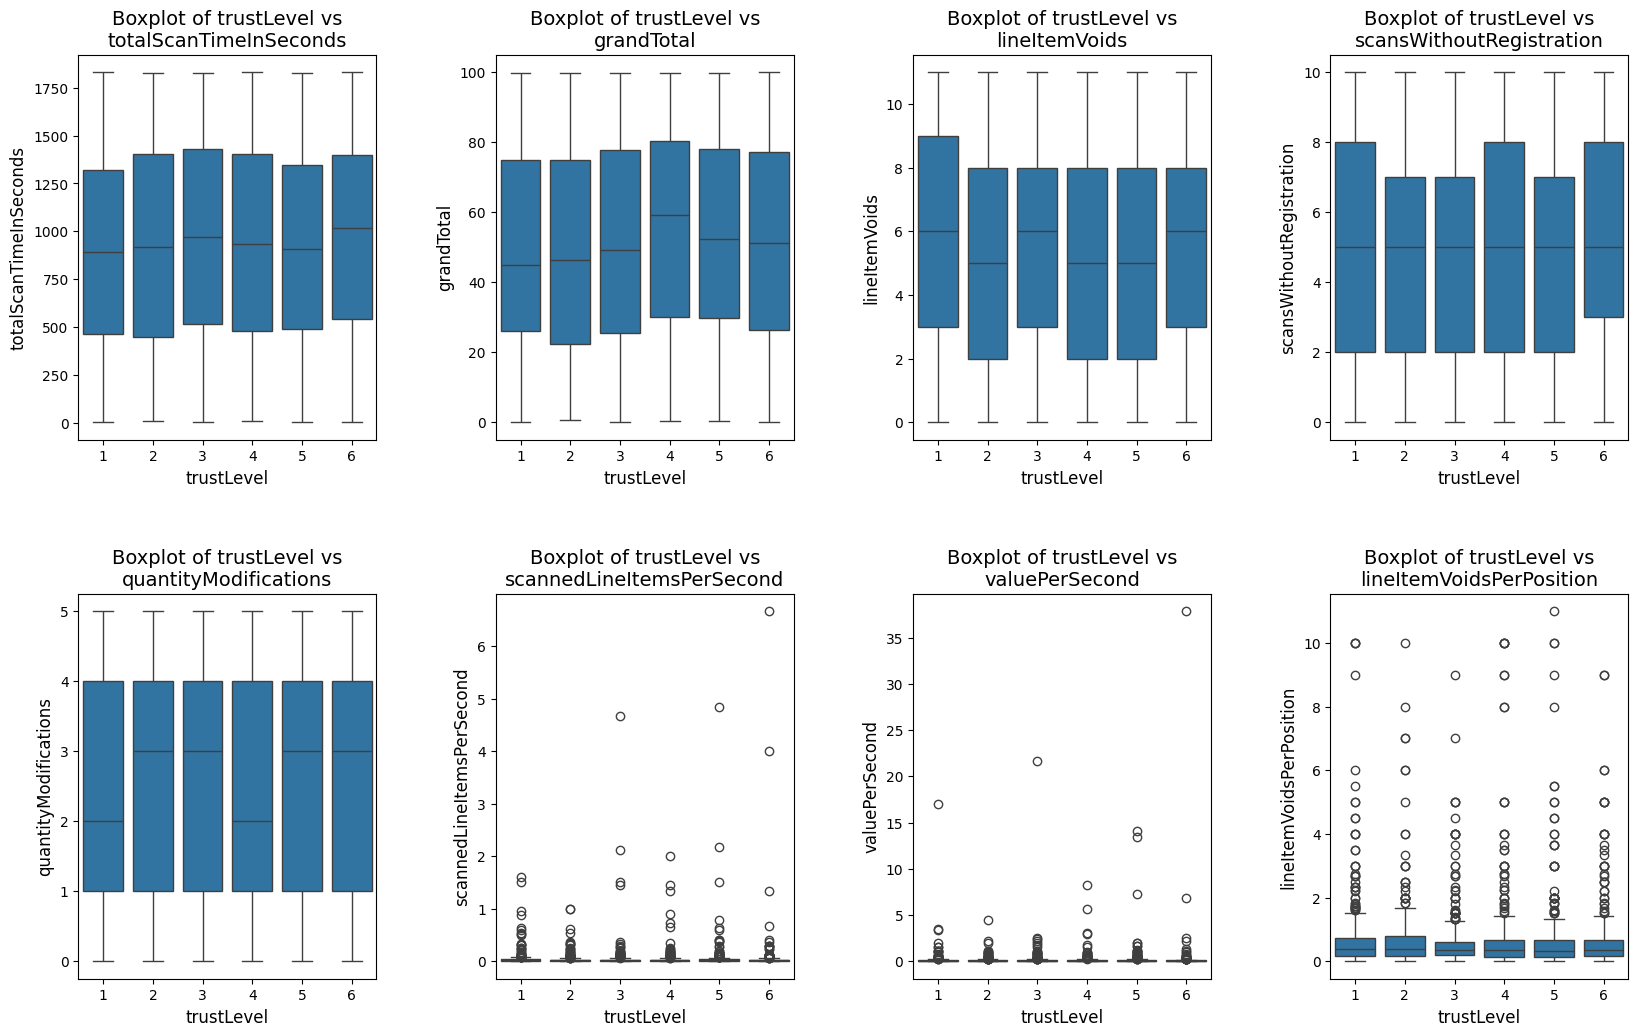

In [ ]:
# Zobrazenie vzťahov numerických atribútov voči atribútu trustLevel
numerical_columns = ["totalScanTimeInSeconds", "grandTotal", "lineItemVoids", 
                     "scansWithoutRegistration", "quantityModifications", 
                     "scannedLineItemsPerSecond", "valuePerSecond", 
                     "lineItemVoidsPerPosition"]

plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x="trustLevel", y=col, data=train)
    plt.title(f'Boxplot of trustLevel vs\n{col}', fontsize=14)
    plt.xlabel("trustLevel", fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [17]:
#Príprava dát

In [5]:
#Kontrola chýbajúcich hodnôt 
print("Počet prázdnych hodnôt:\n",train.isna().sum(),"\n")

#Kontrola duplicitných hodnôt
print("Duplicitné riadky:\n",train.duplicated(),"\n")

Počet prázdnych hodnôt:
 trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64 

Duplicitné riadky:
 0       False
1       False
2       False
3       False
4       False
        ...  
1874    False
1875    False
1876    False
1877    False
1878    False
Length: 1879, dtype: bool 



In [ ]:
#Štatistické testy

#Variance inflation factor test
X = train[["trustLevel","totalScanTimeInSeconds","grandTotal","lineItemVoids","scansWithoutRegistration","quantityModifications","scannedLineItemsPerSecond","valuePerSecond","lineItemVoidsPerPosition"]] 
vif_data=pd.DataFrame()
vif_data["Atribút"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Výsledky VIF:\n",vif_data,"\n")

#Shapiro-Wilk test
stat, p_value = shapiro(train['lineItemVoidsPerPosition'])
print('Shapiro-Wilk Test Statistic:', stat)
print('P-value:', p_value)
alpha = 0.05  
if p_value > alpha:
    print("Dáta sú normálne rozdelené")
else:
    print("Dáta nie sú normálne rozdelené")

#Kruskal-Wallis test
x = train[["trustLevel","totalScanTimeInSeconds","grandTotal","lineItemVoids","scansWithoutRegistration","quantityModifications","scannedLineItemsPerSecond","valuePerSecond","lineItemVoidsPerPosition"]] 
y = train["fraud"]
krus_data = pd.DataFrame()
krus_data["Atribút"] = X.columns
krus_data["Statistic"], krus_data["P-value"] = zip(*[kruskal(*[X[atribut][y == cat] for cat in y.unique()]) for atribut in X.columns])
print("\nVýsledky kruskal-wallis:\n",krus_data)

Výsledky VIF:
                      Atribút       VIF
0                 trustLevel  4.091323
1     totalScanTimeInSeconds  3.637114
2                 grandTotal  3.480947
3              lineItemVoids  3.519430
4   scansWithoutRegistration  2.982728
5      quantityModifications  2.828542
6  scannedLineItemsPerSecond  2.057779
7             valuePerSecond  2.012342
8   lineItemVoidsPerPosition  1.513962 

Shapiro-Wilk Test Statistic: 0.5044248465708154
P-value: 3.438962873349208e-58
Dáta nie sú normálne rozdelené

Výsledky kruskal-wallis:
                      Atribút   Statistic       P-value
0                 trustLevel  202.014903  7.588322e-46
1     totalScanTimeInSeconds   22.880694  1.723746e-06
2                 grandTotal    0.003743  9.512178e-01
3              lineItemVoids    7.568883  5.938458e-03
4   scansWithoutRegistration   10.287010  1.339700e-03
5      quantityModifications    0.002295  9.617915e-01
6  scannedLineItemsPerSecond   20.810158  5.071328e-06
7             va

In [6]:
#IQR
def remove_outliers_iqr(train, column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train = train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]
    return train

#Odstránenie odľahlých hodnôt
train = remove_outliers_iqr(train, 'scannedLineItemsPerSecond')
train = remove_outliers_iqr(train, 'valuePerSecond')
train = remove_outliers_iqr(train, 'lineItemVoidsPerPosition')

#Odstránenie štatisticky nevýznamného atribútu quantityModifications a atribútu fraud
X_train = train.drop(["fraud","quantityModifications"], axis=1)  
y_train = train['fraud'] 

X_test = test.drop(["fraud","quantityModifications"],  axis=1)  
y_test = test['fraud'] 

In [21]:
#Spustenie algoritmov s nenadvzorkovanými dátami

In [ ]:
#KNN

#Trénovanie modelu
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Predikovanie
y_pred_knn = knn.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Knn Accuracy: {accuracy_knn * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_knn))

Knn Accuracy: 94.72%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    474394
           1       0.08      0.01      0.02     23727

    accuracy                           0.95    498121
   macro avg       0.51      0.50      0.50    498121
weighted avg       0.91      0.95      0.93    498121

Kontigenčná tabuľka:
 [[471606   2788]
 [ 23498    229]]


In [ ]:
#SVM

#Nastavenie váhy tried
svm = SVC(kernel='linear', class_weight={0: 1, 1: 2})

#Trénovanie modelu
svm.fit(X_train, y_train)

#Predikovanie
y_pred_svm = svm.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_report(y_test, y_pred_svm))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 96.93%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    474394
           1       0.66      0.73      0.69     23727

    accuracy                           0.97    498121
   macro avg       0.82      0.86      0.84    498121
weighted avg       0.97      0.97      0.97    498121

Kontigenčná tabuľka:
 [[465458   8936]
 [  6349  17378]]


In [ ]:
#Rozhodovací strom

#Nastavenie váhy tried
dt = DecisionTreeClassifier(random_state=42,class_weight={0: 1, 1: 3})

#Trénovanie modelu
dt.fit(X_train, y_train)

#Predikovanie
y_pred_dt = dt.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_report(y_test, y_pred_dt))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_dt))

Tree Accuracy: 97.21%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    474394
           1       0.73      0.65      0.69     23727

    accuracy                           0.97    498121
   macro avg       0.86      0.82      0.84    498121
weighted avg       0.97      0.97      0.97    498121

Kontigenčná tabuľka:
 [[468811   5583]
 [  8333  15394]]


In [15]:
# Náhodný les

#Trénovanie modelu
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Predikovanie
y_pred_rf = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_rf))

Random forest Accuracy: 97.42%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    474394
           1       0.84      0.57      0.68     23727

    accuracy                           0.97    498121
   macro avg       0.91      0.78      0.83    498121
weighted avg       0.97      0.97      0.97    498121

Kontigenčná tabuľka:
 [[471820   2574]
 [ 10255  13472]]


In [ ]:
#XGBoost

#Nastavenie váhy tried
model = xgb.XGBClassifier(eval_metric='logloss',scale_pos_weight=2)

#Trénovanie modelu
model.fit(X_train, y_train)

#Predikovanie
y_pred_xgb = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(classification_report(y_test, y_pred_xgb))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 98.03%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    474394
           1       0.81      0.77      0.79     23727

    accuracy                           0.98    498121
   macro avg       0.90      0.88      0.89    498121
weighted avg       0.98      0.98      0.98    498121

Kontigenčná tabuľka:
 [[470051   4343]
 [  5459  18268]]


In [18]:
#Logistická regresia

#Nastavenie váhy tried
model = LogisticRegression(class_weight={0: 1, 1: 4})

#Trénovanie modelu
model.fit(X_train, y_train)

#Predikovanie
y_pred_lr = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic regresion Accuracy: {accuracy_lr * 100:.2f}%")
print(classification_report(y_test, y_pred_lr))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_lr))

Logistic regresion Accuracy: 95.63%
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    474394
           1       0.53      0.84      0.65     23727

    accuracy                           0.96    498121
   macro avg       0.76      0.90      0.81    498121
weighted avg       0.97      0.96      0.96    498121

Kontigenčná tabuľka:
 [[456308  18086]
 [  3704  20023]]


C:\Users\janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#NaiveBayes

#Trénovanie modelu
model=GaussianNB()
model.fit(X_train, y_train)

#Predikovanie
y_pred_nb = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_report(y_test, y_pred_nb))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 95.16%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    474394
           1       0.49      0.63      0.55     23727

    accuracy                           0.95    498121
   macro avg       0.74      0.80      0.76    498121
weighted avg       0.96      0.95      0.95    498121

Kontigenčná tabuľka:
 [[459079  15315]
 [  8790  14937]]


In [21]:
#Nadvzorkovanie dát pomocou SMOTE

#KNN

#Nastavenie pomeru nadvzorkovania
smote = SMOTE(sampling_strategy = 0.9,random_state=42)

#Nadvzorkovanie dát
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#Vypísanie pomeru dát s triedou 1 ku dátam s triedou 0
print("KNN SMOTE:", Counter(y_train_res))

#Vytvorenie novej trénovacej množiny z nadvzokrovaných dát
knn_train = pd.DataFrame(X_train_res, columns=X_train.columns)  
knn_train['fraud'] = y_train_res  


#SVM
smote = SMOTE(sampling_strategy = 0.2,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("SVM SMOTE:", Counter(y_train_res))
svm_train = pd.DataFrame(X_train_res, columns=X_train.columns)  
svm_train['fraud'] = y_train_res 

#Rozhodovací strom
smote = SMOTE(sampling_strategy = 0.3,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Rozhodovací strom SMOTE:", Counter(y_train_res))
tree_train = pd.DataFrame(X_train_res, columns=X_train.columns)  
tree_train['fraud'] = y_train_res 

#Náhodný les
smote = SMOTE(sampling_strategy = 0.9,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Náhodný les SMOTE:", Counter(y_train_res))
forest_train = pd.DataFrame(X_train_res, columns=X_train.columns)  
forest_train['fraud'] = y_train_res 

#XGBoost
smote = SMOTE(sampling_strategy = 0.6,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("XGBoost SMOTE:", Counter(y_train_res))
boost_train = pd.DataFrame(X_train_res, columns=X_train.columns)  
boost_train['fraud'] = y_train_res 

#Logistická regresia
smote = SMOTE(sampling_strategy = 0.2,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Logistická regresia SMOTE:", Counter(y_train_res))
lr_train = pd.DataFrame(X_train_res, columns=X_train.columns)  
lr_train['fraud'] = y_train_res 

#NaiveBayes
smote = SMOTE(sampling_strategy = 0.4,random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("NaiveBayes SMOTE:", Counter(y_train_res))
nb_train = pd.DataFrame(X_train_res, columns=X_train.columns)  
nb_train['fraud'] = y_train_res 

KNN SMOTE: Counter({0: 1243, 1: 1118})
SVM SMOTE: Counter({0: 1243, 1: 248})
Rozhodovací strom SMOTE: Counter({0: 1243, 1: 372})
Náhodný les SMOTE: Counter({0: 1243, 1: 1118})
XGBoost SMOTE: Counter({0: 1243, 1: 745})
Logistická regresia SMOTE: Counter({0: 1243, 1: 248})
NaiveBayes SMOTE: Counter({0: 1243, 1: 497})


In [30]:
#Spustenie algoritmov s nadvzorkovanými dátami

In [25]:
#KNN

#Načítanie nadvzokovaných dát
train=knn_train
X_train = train.drop("fraud", axis=1)  
y_train = train['fraud'] 

#Trénovanie modelu
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Predikovanie
y_pred_knn = knn.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Knn Accuracy: {accuracy_knn * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_knn))

# Výpočet zisku na základe prenásobenia matice
cm = confusion_matrix(y_test, y_pred_knn)
TN, FP, FN, TP = cm.ravel()
result = FP * (-5) + FN * (-15) + TP * 10
print("\nSuma:", result)

Knn Accuracy: 74.23%
              precision    recall  f1-score   support

           0       0.96      0.76      0.85    474394
           1       0.07      0.33      0.11     23727

    accuracy                           0.74    498121
   macro avg       0.51      0.55      0.48    498121
weighted avg       0.92      0.74      0.81    498121

Kontigenčná tabuľka:
 [[361858 112536]
 [ 15835   7892]]

Suma: -721285


In [26]:
#SVM

#Načítanie nadvzokovaných dát
train=svm_train
X_train = train.drop("fraud", axis=1)  
y_train = train['fraud']

#Nastavenie váhy tried
svm = SVC(kernel='linear', class_weight={0: 1, 1: 2})

#Trénovanie modelu
svm.fit(X_train, y_train)

#Predikovanie
y_pred_svm = svm.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_report(y_test, y_pred_svm))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_svm))

# Výpočet zisku na základe prenásobenia matice
cm = confusion_matrix(y_test, y_pred_svm)
TN, FP, FN, TP = cm.ravel()
result = FP * (-5) + FN * (-15) + TP * 10
print("\nSuma:", result)

SVM Accuracy: 94.82%
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    474394
           1       0.48      0.89      0.62     23727

    accuracy                           0.95    498121
   macro avg       0.74      0.92      0.80    498121
weighted avg       0.97      0.95      0.96    498121

Kontigenčná tabuľka:
 [[451219  23175]
 [  2645  21082]]

Suma: 55270


In [27]:
#Rozhodovací strom

#Načítanie nadvzokovaných dát
train=tree_train
X_train = train.drop("fraud", axis=1)  
y_train = train['fraud']

#Nastavenie váhy tried
dt = DecisionTreeClassifier(random_state=42,class_weight={0: 1, 1: 3})

#Trénovanie modelu
dt.fit(X_train, y_train)

#Predikovanie
y_pred_dt = dt.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(classification_report(y_test, y_pred_dt))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_dt))

# Výpočet zisku na základe prenásobenia matice
cm = confusion_matrix(y_test, y_pred_dt)
TN, FP, FN, TP = cm.ravel()
result = FP * (-5) + FN * (-15) + TP * 10
print("\nSuma:", result)

Tree Accuracy: 96.76%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    474394
           1       0.64      0.72      0.68     23727

    accuracy                           0.97    498121
   macro avg       0.81      0.85      0.83    498121
weighted avg       0.97      0.97      0.97    498121

Kontigenčná tabuľka:
 [[464985   9409]
 [  6707  17020]]

Suma: 22550


In [30]:
# Náhodný les

#Načítanie nadvzokovaných dát
train=forest_train
X_train = train.drop("fraud", axis=1)  
y_train = train['fraud']

#Trénovanie modelu
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Predikovanie
y_pred_rf = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_rf))

# Výpočet zisku na základe prenásobenia matice
cm = confusion_matrix(y_test, y_pred_rf)
TN, FP, FN, TP = cm.ravel()
result = FP * (-5) + FN * (-15) + TP * 10
print("\nSuma:", result)

Random forest Accuracy: 96.70%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    474394
           1       0.65      0.68      0.66     23727

    accuracy                           0.97    498121
   macro avg       0.81      0.83      0.82    498121
weighted avg       0.97      0.97      0.97    498121

Kontigenčná tabuľka:
 [[465574   8820]
 [  7638  16089]]

Suma: 2220


In [31]:
#XGBoost

#Načítanie nadvzokovaných dát
train=boost_train
X_train = train.drop("fraud", axis=1)  
y_train = train['fraud']

#Nastavenie váhy tried
model = xgb.XGBClassifier(eval_metric='logloss',scale_pos_weight=2)

#Trénovanie modelu
model.fit(X_train, y_train)

#Predikovanie
y_pred_xgb = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(classification_report(y_test, y_pred_xgb))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_xgb))

# Výpočet zisku na základe prenásobenia matice
cm = confusion_matrix(y_test, y_pred_xgb)
TN, FP, FN, TP = cm.ravel()
result = FP * (-5) + FN * (-15) + TP * 10
print("\nSuma:", result)

XGBoost Accuracy: 97.43%
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    474394
           1       0.69      0.84      0.76     23727

    accuracy                           0.97    498121
   macro avg       0.84      0.91      0.87    498121
weighted avg       0.98      0.97      0.98    498121

Kontigenčná tabuľka:
 [[465274   9120]
 [  3687  20040]]

Suma: 99495


In [32]:
#Logistická regresia

#Načítanie nadvzokovaných dát
train=lr_train
X_train = train.drop("fraud", axis=1)  
y_train = train['fraud']

#Nastavenie váhy tried
model = LogisticRegression(class_weight={0: 1, 1: 4})

#Trénovanie modelu
model.fit(X_train, y_train)

#Predikovanie
y_pred_lr = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic regresion Accuracy: {accuracy_lr * 100:.2f}%")
print(classification_report(y_test, y_pred_lr))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_lr))

# Výpočet zisku na základe prenásobenia matice
cm = confusion_matrix(y_test, y_pred_lr)
TN, FP, FN, TP = cm.ravel()
result = FP * (-5) + FN * (-15) + TP * 10
print("\nSuma:", result)

Logistic regresion Accuracy: 93.42%
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    474394
           1       0.42      0.94      0.58     23727

    accuracy                           0.93    498121
   macro avg       0.71      0.94      0.77    498121
weighted avg       0.97      0.93      0.95    498121

Kontigenčná tabuľka:
 [[442982  31412]
 [  1366  22361]]

Suma: 46060


C:\Users\janak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
#NaiveBayes

#Načítanie nadvzokovaných dát
train=nb_train
X_train = train.drop("fraud", axis=1)  
y_train = train['fraud']

#Trénovanie modelu
model=GaussianNB()
model.fit(X_train, y_train)

#Predikovanie
y_pred_nb = model.predict(X_test)

#Výpis výsledkov klasifikácie modelu
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_report(y_test, y_pred_nb))
print("Kontigenčná tabuľka:\n", confusion_matrix(y_test, y_pred_nb))

# Výpočet zisku na základe prenásobenia matice
cm = confusion_matrix(y_test, y_pred_nb)
TN, FP, FN, TP = cm.ravel()
result = FP * (-5) + FN * (-15) + TP * 10
print("\nSuma:", result)

Naive Bayes Accuracy: 92.96%
              precision    recall  f1-score   support

           0       0.98      0.94      0.96    474394
           1       0.37      0.71      0.49     23727

    accuracy                           0.93    498121
   macro avg       0.68      0.83      0.73    498121
weighted avg       0.96      0.93      0.94    498121

Kontigenčná tabuľka:
 [[446233  28161]
 [  6893  16834]]

Suma: -75860
